In [221]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import FactorAnalysis
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


In [222]:
iris = load_iris()
X = iris.data  # Features: sepal length, sepal width, petal length, petal width
y = iris.target  # Labels: 0=Setosa, 1=Versicolor, 2=Virginica

print(iris.DESCR)  # Print the dataset description


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [223]:
# Check the first few rows of the dataset
print(f"Feature names: {iris.feature_names}")
print(f"Target names: {iris.target_names}")
print(f"First few rows of data: \n{X[:5]}")

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
First few rows of data: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [224]:
def apply_kmeans(X, n_clusters=3, random_state=42):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    predictions = kmeans.fit_predict(X)
    return predictions

In [225]:
def encode_labels(y):
    le = LabelEncoder()
    return le.fit_transform(y)

In [226]:
from scipy.stats import mode
def map_clusters_to_labels(predictions, y_encoded):
    cluster_labels = np.zeros_like(predictions)
    for i in range(3):
        mask = (predictions == i)
        cluster_labels[mask] = mode(y_encoded[mask])[0]
    return cluster_labels

In [227]:
def calculate_accuracy(y_encoded, mapped_predictions):
    return accuracy_score(y_encoded, mapped_predictions) * 100


In [228]:
def compare_arrays(array1, array2):
    if len(array1) != len(array2):
        raise ValueError("Arrays must have the same length for comparison.")
    
    matches = np.sum(array1 == array2)
    mismatches = len(array1) - matches
    accuracy = matches / len(array1) * 100  # Accuracy in percentage
    
    return {
        "matches": matches,
        "mismatches": mismatches,
        "accuracy": accuracy
    }

In [229]:
# Main execution
predictions = apply_kmeans(X, n_clusters=3, random_state=65)
y_encoded = encode_labels(y)
mapped_predictions = map_clusters_to_labels(predictions, y_encoded)
accuracy = calculate_accuracy(y_encoded, mapped_predictions)

print(f"Accuracy of k-means clustering: {accuracy:.2f}%")

Accuracy of k-means clustering: 89.33%


In [230]:
preVSact = compare_arrays(predictions, y_encoded)

print(f"Matches: {preVSact['matches']}")
print(f"Mismatches: {preVSact['mismatches']}")
print(f"Accuracy: {preVSact['accuracy']}%")

Matches: 134
Mismatches: 16
Accuracy: 89.33333333333333%


In [231]:
# Apply Factor Analysis to reduce to 2 dimensions
fa = FactorAnalysis(n_components=2, random_state=49)
X_reduced = fa.fit_transform(X)

predictions_reduced = apply_kmeans(X_reduced, n_clusters=3, random_state=49)

# Map the k-means predictions from the reduced dataset to the original labels
mapped_predictions_reduced = map_clusters_to_labels(predictions_reduced, y_encoded)

accuracy_reduced = calculate_accuracy(y_encoded, mapped_predictions_reduced)
print(f"Accuracy of k-means clustering on reduced data: {accuracy_reduced:.2f}%")

Accuracy of k-means clustering on reduced data: 72.67%


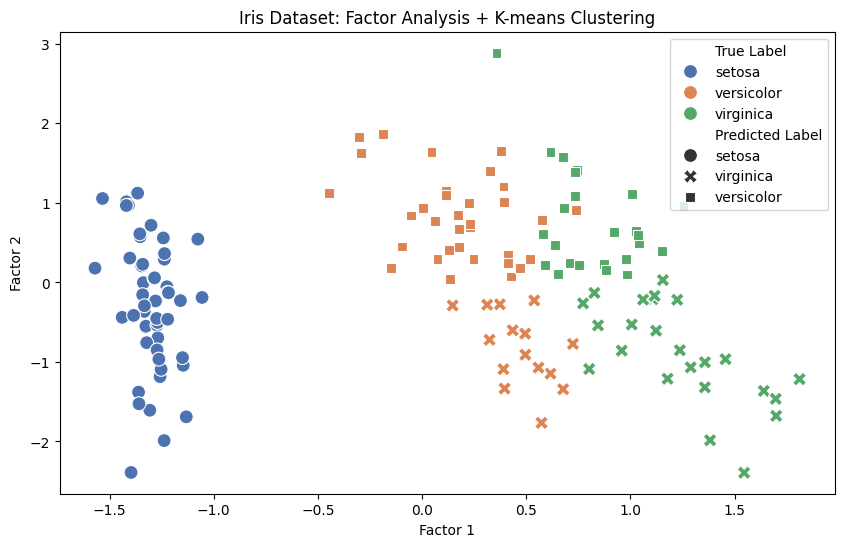

In [232]:
# Create a DataFrame for easy plotting
df = pd.DataFrame(X_reduced, columns=['Factor 1', 'Factor 2'])
df['True Label'] = iris.target_names[y]
df['Predicted Label'] = iris.target_names[mapped_predictions_reduced]

# Plot the results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Factor 1', y='Factor 2', hue='True Label', style='Predicted Label', palette='deep', s=100)
plt.title('Iris Dataset: Factor Analysis + K-means Clustering')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.legend()
plt.show()


Accuracy of k-means clustering on reduced data: 72.67%


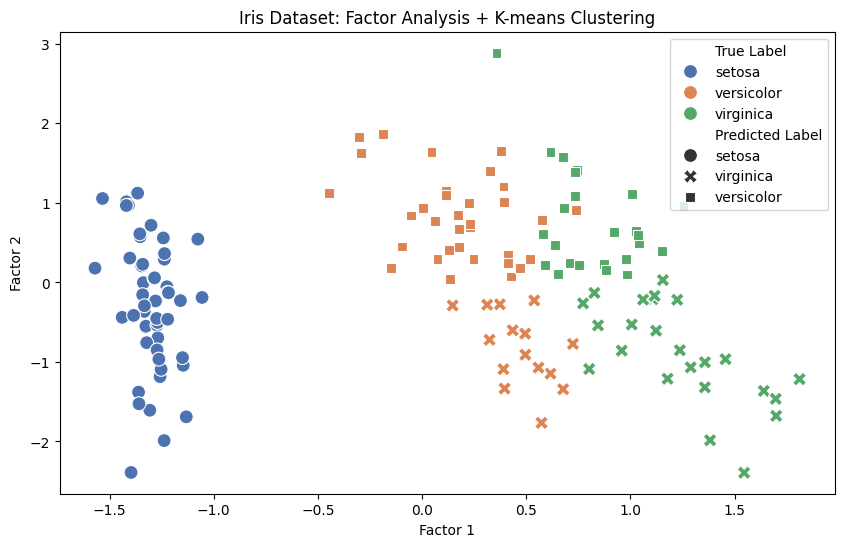

In [233]:
# Apply Factor Analysis to reduce to 2 dimensions
fa = FactorAnalysis(n_components=2, random_state=49)
X_reduced = fa.fit_transform(X)

# Apply k-means clustering to the reduced dataset
predictions_reduced = apply_kmeans(X_reduced, n_clusters=3, random_state=49)

# Map the k-means predictions to the true labels
mapped_predictions_reduced = map_clusters_to_labels(predictions_reduced, y_encoded)

# Calculate accuracy
accuracy_reduced = calculate_accuracy(y_encoded, mapped_predictions_reduced)
print(f"Accuracy of k-means clustering on reduced data: {accuracy_reduced:.2f}%")

# Visualize the reduced dataset
df = pd.DataFrame(X_reduced, columns=['Factor 1', 'Factor 2'])
df['True Label'] = iris.target_names[y]
df['Predicted Label'] = iris.target_names[mapped_predictions_reduced]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Factor 1', y='Factor 2', hue='True Label', style='Predicted Label', palette='deep', s=100)
plt.title('Iris Dataset: Factor Analysis + K-means Clustering')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.legend()
plt.show()